Given a 2D matrix matrix, handle multiple queries of the following type:

    Calculate the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).

Implement the NumMatrix class:

    NumMatrix(int[][] matrix) Initializes the object with the integer matrix matrix.
    int sumRegion(int row1, int col1, int row2, int col2) Returns the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).

 

Example 1:

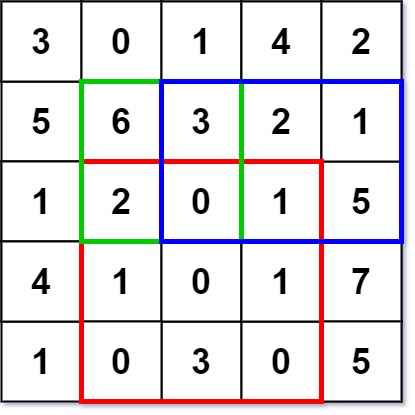

Input
["NumMatrix", "sumRegion", "sumRegion", "sumRegion"]
[[[[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]], [2, 1, 4, 3], [1, 1, 2, 2], [1, 2, 2, 4]]
Output
[null, 8, 11, 12]

Explanation
NumMatrix numMatrix = new NumMatrix([[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]);
numMatrix.sumRegion(2, 1, 4, 3); // return 8 (i.e sum of the red rectangle)
numMatrix.sumRegion(1, 1, 2, 2); // return 11 (i.e sum of the green rectangle)
numMatrix.sumRegion(1, 2, 2, 4); // return 12 (i.e sum of the blue rectangle)

 

Constraints:

    m == matrix.length
    n == matrix[i].length
    1 <= m, n <= 200
    -105 <= matrix[i][j] <= 105
    0 <= row1 <= row2 < m
    0 <= col1 <= col2 < n
    At most 104 calls will be made to sumRegion.



In [23]:
from typing import List

class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        self.matrix = matrix

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        sumReg = 0
        for row_num in range(row1, row2 + 1):
            sumReg += sum(self.matrix[row_num][col1: col2 + 1])
        return sumReg

# Your NumMatrix object will be instantiated and called as such:
# obj = NumMatrix(matrix)
# param_1 = obj.sumRegion(row1,col1,row2,col2)

In [63]:
from typing import List

class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        self.matrix = []
        for row in matrix:
            cum_sum = [0]
            for num in row:
                cum_sum.append(num + cum_sum[-1])
            cum_sum.append(cum_sum[-1])
            self.matrix.append(cum_sum)

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        sumReg = 0
        for row_num in range(row1, row2 + 1):
            sumReg += self.matrix[row_num][col2 + 1] - self.matrix[row_num][col1]
        return sumReg

# Your NumMatrix object will be instantiated and called as such:
# obj = NumMatrix(matrix)
# param_1 = obj.sumRegion(row1,col1,row2,col2)

In [106]:
from typing import List

class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        self.matrix = []
        self.matrix.append([0] * (len(matrix[0]) + 2))
        for i, row in enumerate(matrix):
            cum_sum = [0]
            for num in row:
                cum_sum.append(num + cum_sum[-1])
            for j in range(len(cum_sum)):
                cum_sum[j] += self.matrix[-1][j]
            cum_sum.append(cum_sum[-1])
            self.matrix.append(cum_sum)

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        return (
            self.matrix[row2 + 1][col2 + 1] 
            - self.matrix[row2 + 1][col1] 
            - self.matrix[row1][col2 + 1]
            + self.matrix[row1][col1]
        )

# Your NumMatrix object will be instantiated and called as such:
# obj = NumMatrix(matrix)
# param_1 = obj.sumRegion(row1,col1,row2,col2)

In [107]:
s = NumMatrix([[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]])

In [108]:
s.sumRegion(2, 1, 4, 3) # 8

8

In [109]:
s.sumRegion(1, 1, 2, 2) # 11

11

In [110]:
s.sumRegion(1, 2, 2, 4) # 12

12